# Pull Bitcoin Data

In [1]:
pip install yfinance


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd

In [3]:
btc_ticker = 'BTC-USD'

date_ranges = [
    ('2016-10-01', '2017-01-01'),
    ('2020-10-01', '2021-01-01'),
    ('2024-10-01', pd.Timestamp.now().strftime('%Y-%m-%d'))
]


In [4]:
# Initialize an empty DataFrame to hold all the data
all_btc_data = pd.DataFrame()

# Fetch and append the data for each date range
for start_date, end_date in date_ranges:
    btc_data = yf.download(btc_ticker, start=start_date, end=end_date)
    btc_data['Date'] = btc_data.index  # Add the date as a column
    btc_data['Range'] = f"{start_date} to {end_date}"  # Add a column indicating the date range
    all_btc_data = pd.concat([all_btc_data, btc_data], ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
all_btc_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Date,Range
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
0,613.982971,613.982971,615.237000,609.929016,609.929016,56357000,2016-10-01,2016-10-01 to 2017-01-01
1,610.892029,610.892029,614.005005,609.682007,613.947998,39249800,2016-10-02,2016-10-01 to 2017-01-01
2,612.132996,612.132996,612.567993,610.455017,610.968018,46798300,2016-10-03,2016-10-01 to 2017-01-01
3,610.203979,610.203979,612.054016,609.479004,612.052002,49801600,2016-10-04,2016-10-01 to 2017-01-01
4,612.510986,612.510986,613.814026,609.617004,610.218018,68077504,2016-10-05,2016-10-01 to 2017-01-01


In [6]:
all_btc_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume,Date,Range
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
241,95962.531250,95962.531250,97361.179688,91778.664062,91978.140625,71133452438,2024-11-27,2024-10-01 to 2024-12-03
242,95652.468750,95652.468750,96650.203125,94677.351562,95954.945312,52260008261,2024-11-28,2024-10-01 to 2024-12-03
243,97461.523438,97461.523438,98693.171875,95407.882812,95653.953125,54968682476,2024-11-29,2024-10-01 to 2024-12-03
244,96449.054688,96449.054688,97499.343750,96144.218750,97468.812500,31634227866,2024-11-30,2024-10-01 to 2024-12-03
245,97279.789062,97279.789062,97888.125000,95770.187500,96461.335938,36590695296,2024-12-01,2024-10-01 to 2024-12-03


In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the ticker symbol for Bitcoin
btc_ticker = 'BTC-USD'

# Define the date ranges
date_ranges = [
    ('2016-10-01', '2017-01-01'),
    ('2020-10-01', '2021-01-01'),
    ('2024-10-01', pd.Timestamp.now().strftime('%Y-%m-%d'))
]

# Initialize a dictionary to store cumulative returns for each cycle
cumulative_returns = {}

# Fetch data and calculate cumulative returns for each period
for start_date, end_date in date_ranges:
    btc_data = yf.download(btc_ticker, start=start_date, end=end_date)
    btc_data['Daily Return'] = btc_data['Close'].pct_change()  # Calculate daily percentage change
    btc_data['Cumulative Return'] = (1 + btc_data['Daily Return']).cumprod() - 1  # Cumulative return
    btc_data.reset_index(inplace=True)  # Reset index to keep the dates
    btc_data['Day'] = range(1, len(btc_data) + 1)  # Create a day index starting at 1
    cumulative_returns[f"{start_date} to {end_date}"] = btc_data[['Day', 'Date', 'Cumulative Return']]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


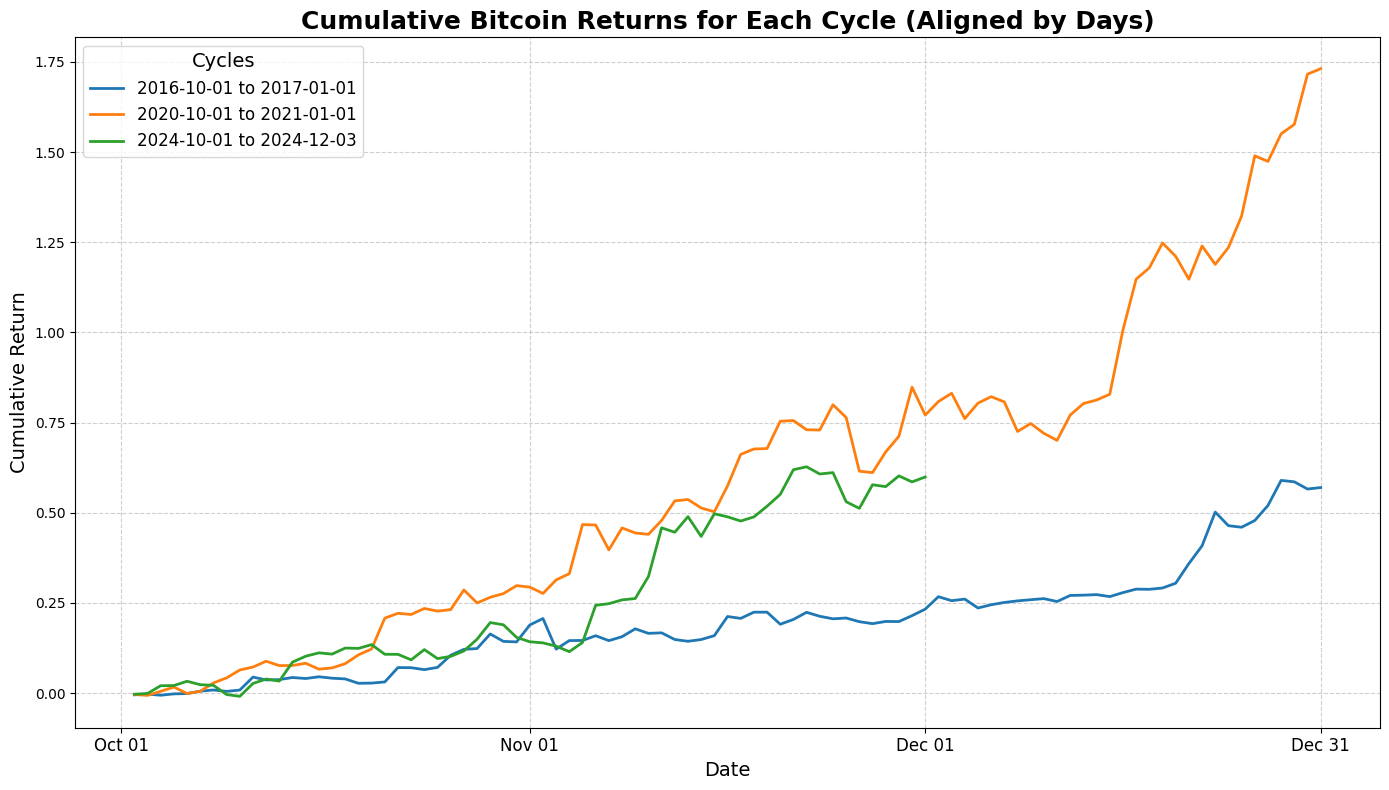

In [8]:
# Plot the cumulative returns
plt.figure(figsize=(14, 8))

for label, data in cumulative_returns.items():
    plt.plot(data['Day'], data['Cumulative Return'], label=label, linewidth=2)

# Convert day numbers to corresponding dates for x-axis labels
# Using the first cycle as the reference for day-to-date mapping
reference_cycle = list(cumulative_returns.values())[0]
reference_dates = reference_cycle['Date']
day_to_date_mapping = dict(zip(reference_cycle['Day'], reference_dates))

# Format the x-axis with corresponding dates
plt.xticks(
    ticks=[1, 32, 62, 92],  # Example tick positions (Day 1 -> Oct 1, Day 32 -> Nov 1, etc.)
    labels=[
        day_to_date_mapping[1].strftime('%b %d'),  # Oct 1
        day_to_date_mapping[32].strftime('%b %d'),  # Nov 1
        day_to_date_mapping[62].strftime('%b %d'),  # Dec 1
        day_to_date_mapping[92].strftime('%b %d') if 92 in day_to_date_mapping else 'End'
    ],
    fontsize=12
)

# Prettify the plot
plt.title('Cumulative Bitcoin Returns for Each Cycle (Aligned by Days)', fontsize=18, fontweight='bold')
plt.ylabel('Cumulative Return', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='upper left', title='Cycles', title_fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for Bitcoin
btc_ticker = 'BTC-USD'

# Define the date ranges
date_ranges = [
    ('2016-10-01', '2017-01-01'),
    ('2020-10-01', '2021-01-01'),
    ('2024-10-01', pd.Timestamp.now().strftime('%Y-%m-%d'))
]

# Define colors for each month
month_colors = {
    10: 'blue',  # October
    11: 'green',  # November
    12: 'orange'  # December
}

# Initialize a dictionary to store daily price changes for each cycle
daily_changes = {}

# Fetch data and calculate daily percentage changes for each period
for start_date, end_date in date_ranges:
    btc_data = yf.download(btc_ticker, start=start_date, end=end_date)
    btc_data['Daily Change (%)'] = btc_data['Close'].pct_change() * 100  # Daily percentage change
    btc_data.reset_index(inplace=True)  # Reset index to keep the dates
    btc_data['Day'] = range(1, len(btc_data) + 1)  # Create a day index starting at 1
    btc_data['Month'] = btc_data['Date'].dt.month  # Extract the month
    daily_changes[f"{start_date} to {end_date}"] = btc_data[['Day', 'Date', 'Daily Change (%)', 'Month']]

# Create subplots

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


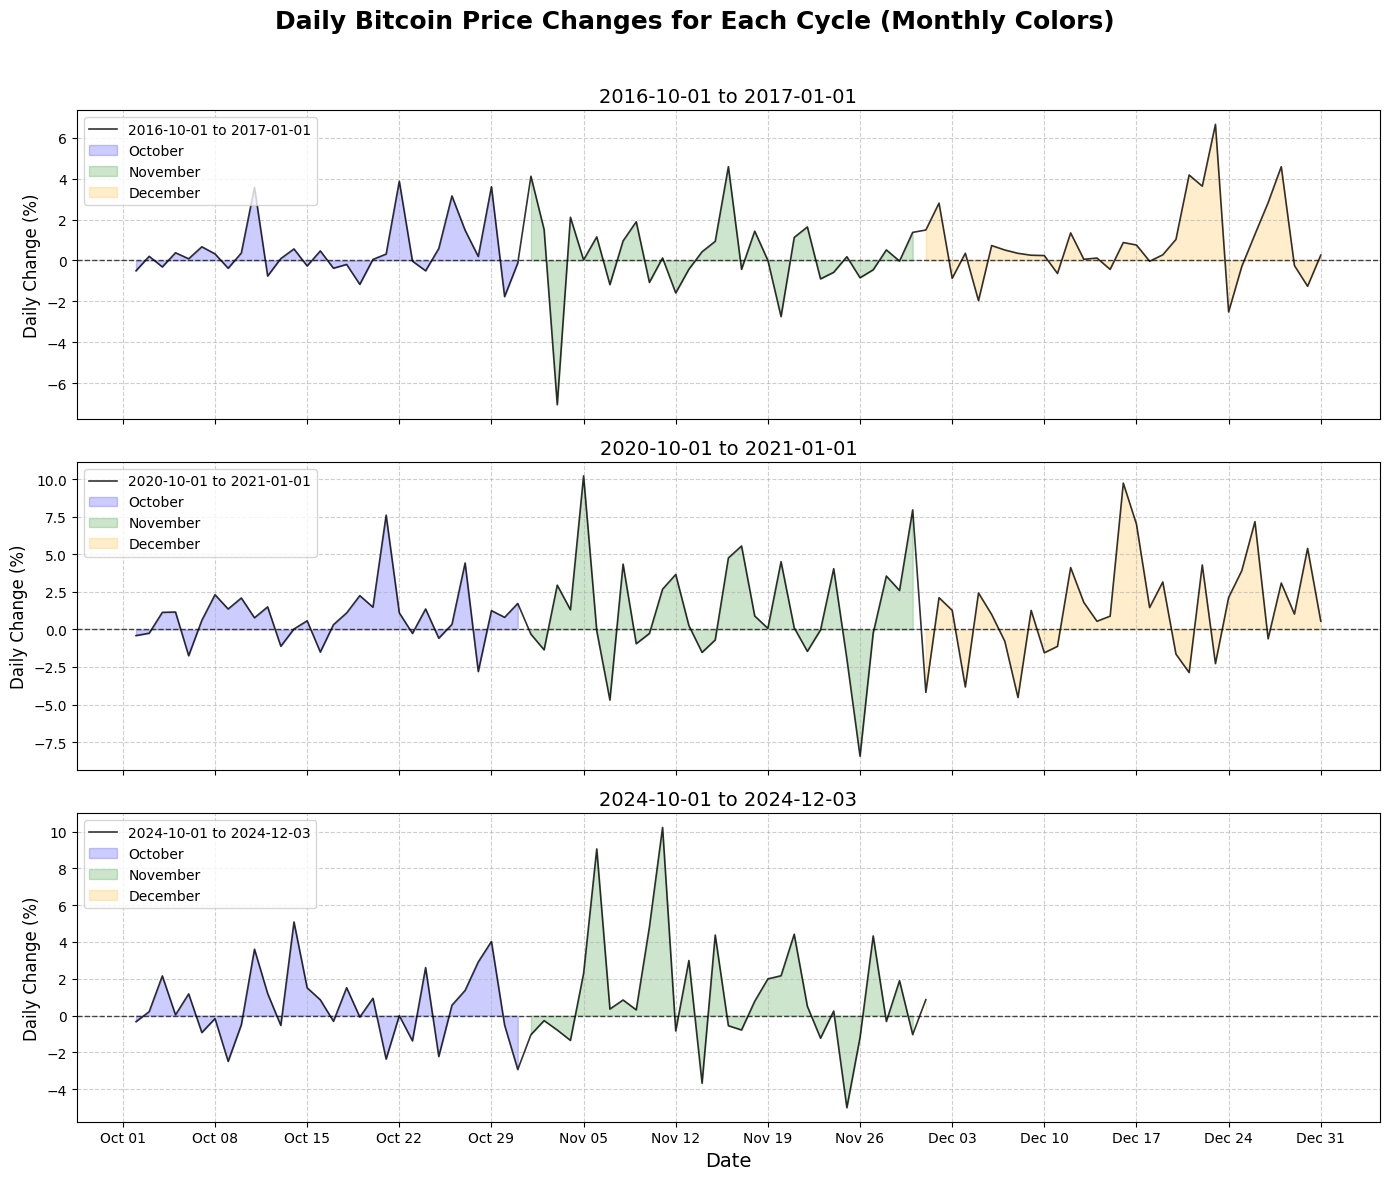

In [10]:

fig, axes = plt.subplots(len(daily_changes), 1, figsize=(14, 12), sharex=True)
fig.suptitle('Daily Bitcoin Price Changes for Each Cycle (Monthly Colors)', fontsize=18, fontweight='bold')

# Plot each cycle in a separate subplot
for ax, (label, data) in zip(axes, daily_changes.items()):
    # Plot the data as one continuous line
    ax.plot(
        data['Day'], 
        data['Daily Change (%)'], 
        color='black', 
        linewidth=1.2, 
        alpha=0.8, 
        label=label
    )
    
    # Overlay the monthly segments with colors
    for month, color in month_colors.items():
        month_data = data[data['Month'] == month]
        ax.fill_between(
            month_data['Day'], 
            month_data['Daily Change (%)'], 
            color=color, 
            alpha=0.2, 
            label=month_data['Date'].dt.strftime('%B').iloc[0] if not month_data.empty else None
        )
    
    ax.axhline(0, color='black', linewidth=1, linestyle='--', alpha=0.7)  # Add horizontal line at 0
    ax.set_title(label, fontsize=14)
    ax.set_ylabel('Daily Change (%)', fontsize=12)
    ax.grid(visible=True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=10, loc='upper left')

# Format the x-axis with more dates (every 7 days, for example)
reference_cycle = list(daily_changes.values())[0]
reference_dates = reference_cycle['Date']
day_to_date_mapping = dict(zip(reference_cycle['Day'], reference_dates))
all_days = reference_cycle['Day']

# Generate ticks for every 7 days
x_ticks = range(1, len(all_days) + 1, 7)
x_labels = [day_to_date_mapping[day].strftime('%b %d') for day in x_ticks if day in day_to_date_mapping]
axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels(x_labels, fontsize=10)

# Adjust layout
plt.xlabel('Date', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()


In [13]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Bitcoin
btc_ticker = 'BTC-USD'

# Define the date ranges
date_ranges = [
    ('2016-10-01', '2017-01-01'),
    ('2020-10-01', '2021-01-01'),
    ('2024-10-01', pd.Timestamp.now().strftime('%Y-%m-%d'))
]

# Fetch and calculate daily percentage changes for all periods
btc_data_all = pd.DataFrame()

for start_date, end_date in date_ranges:
    btc_data = yf.download(btc_ticker, start=start_date, end=end_date)
    btc_data['Daily Change (%)'] = btc_data['Close'].pct_change() * 100  # Calculate daily percentage change
    btc_data['Month'] = btc_data.index.month  # Extract the month
    btc_data['Year'] = btc_data.index.year  # Extract the year
    btc_data.reset_index(inplace=True)
    btc_data_all = pd.concat([btc_data_all, btc_data], ignore_index=True)

# Define the return bins
bins = [-float('inf'), -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, float('inf')]
labels = [
    '<=-5%', '-5% to -4%', '-4% to -3%', '-3% to -2%', '-2% to -1%',
    '-1% to 0%', '0% to 1%', '1% to 2%', '2% to 3%', '3% to 4%', '4% to 5%', '>=5%'
]

# Confirm the lengths are correct
assert len(labels) == len(bins) - 1, f"Labels must be one fewer than the bins. Got {len(labels)} labels and {len(bins)} bins."

# Bin the daily returns into the defined ranges
btc_data_all['Return Range'] = pd.cut(btc_data_all['Daily Change (%)'], bins=bins, labels=labels)

# Pivot table to count occurrences by month
summary_table = btc_data_all.pivot_table(
    index='Return Range', 
    columns='Month', 
    values='Daily Change (%)', 
    aggfunc='count', 
    fill_value=0
)

# Map month numbers to names
month_map = {10: 'October', 11: 'November', 12: 'December'}
summary_table.columns = [month_map.get(month, month) for month in summary_table.columns]

# Sort index for proper order
summary_table = summary_table.reindex(labels)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_2194/2745697739.py:39: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  summary_table = btc_data_all.pivot_table(
/tmp/ipykernel_2194/2745697739.py:39: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  summary_table = btc_data_all.pivot_table(


In [14]:
summary_table

,"(, 10)","(, 11)","(, 12)"
Return Range,,,
<=-5%,0,3,0
-5% to -4%,0,1,2
-4% to -3%,0,1,1
-3% to -2%,5,1,3
-2% to -1%,6,12,5
-1% to 0%,23,20,8
0% to 1%,25,18,17
1% to 2%,16,10,9
2% to 3%,6,7,5


# Plot of Returns from Oct - Dec

In [12]:
import matplotlib.pyplot as plt

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for Bitcoin
btc_ticker = 'BTC-USD'

# Define the date ranges
date_ranges = [
    ('2016-10-01', '2017-01-01'),
    ('2020-10-01', '2021-01-01'),
    ('2024-10-01', pd.Timestamp.now().strftime('%Y-%m-%d'))
]

# Initialize a dictionary to store cumulative returns for each cycle
cumulative_returns = {}

# Fetch data and calculate cumulative returns for each period
for start_date, end_date in date_ranges:
    btc_data = yf.download(btc_ticker, start=start_date, end=end_date)
    btc_data['Daily Return'] = btc_data['Close'].pct_change()  # Calculate daily percentage change
    btc_data['Cumulative Return'] = (1 + btc_data['Daily Return']).cumprod() - 1  # Cumulative return
    btc_data.reset_index(inplace=True)  # Reset index to use day numbers
    btc_data['Day'] = range(1, len(btc_data) + 1)  # Add a day number column starting from 1
    cumulative_returns[f"{start_date} to {end_date}"] = btc_data[['Day', 'Cumulative Return']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


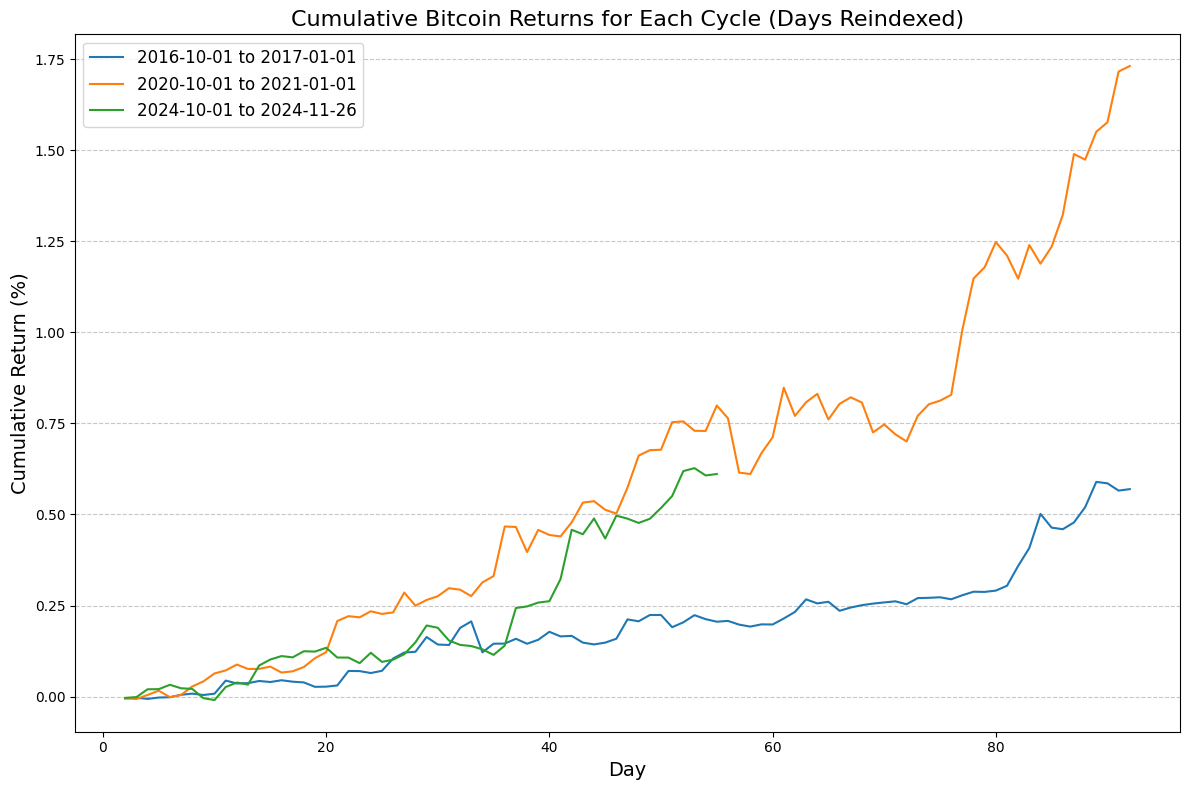

In [21]:
# Plot the cumulative returns
plt.figure(figsize=(12, 8))

for label, data in cumulative_returns.items():
    plt.plot(data['Day'], data['Cumulative Return'], label=label)

plt.title('Cumulative Bitcoin Returns for Each Cycle (Days Reindexed)', fontsize=16)
plt.ylabel('Cumulative Return (%)', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


